In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
# Replace '?' with NaN and drop rows with missing values
df.replace("?", pd.NA, inplace=True)
df.dropna(inplace=True)

In [4]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df = df[(df[numeric_cols] >= 0).all(axis=1)]

df.reset_index(drop=True, inplace=True)

In [5]:
from scipy import stats

# Z-score method for outlier detection (only on numerical columns)
z_scores = stats.zscore(df[numeric_cols])
abs_z_scores = abs(z_scores)
df = df[(abs_z_scores < 3).all(axis=1)]  # Keep rows with z-score < 3

In [6]:
df.shape

(41395, 15)

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns
cat_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature scaling
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
# Split dataset
X = df.drop("income", axis=1)
y = df["income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
log_acc = accuracy_score(y_test, log_preds)

print("Logistic Regression Accuracy:", log_acc)

Logistic Regression Accuracy: 0.8214760236743568


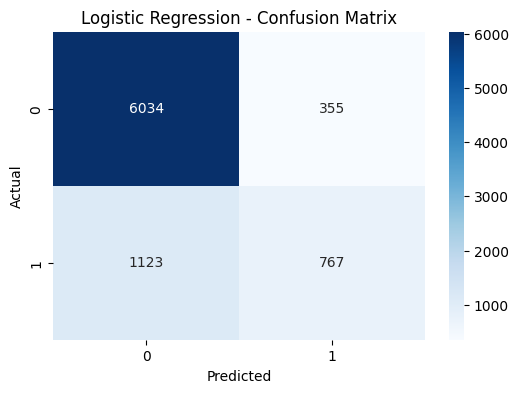

In [11]:
# Logistic Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, log_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [12]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)
nb_acc = accuracy_score(y_test, nb_preds)

print("Naive Bayes Accuracy:", nb_acc)

Naive Bayes Accuracy: 0.8011837178403188


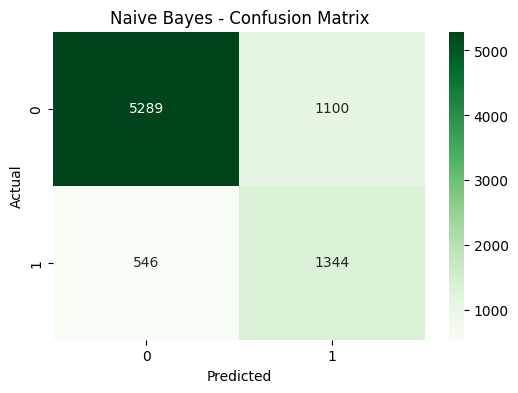

In [13]:
# Naive Bayes Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, nb_preds), annot=True, fmt='d', cmap='Greens')
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()